## Model Development

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ruta de los datos
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Regresion lineal siemple y multiple

#### Lineal

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']]
Y = df['price']

In [7]:
lm.fit(X,Y)

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

In [12]:
lm1 = LinearRegression()
lm1 

LinearRegression()

In [13]:
X = df[['engine-size']]
Y = df['price']
lm.fit(X,Y)  
lm

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]   

#### Lineal multiple

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] 

In [15]:
lm.fit(Z, df['price'])

LinearRegression()

In [17]:
lm.intercept_

-15806.62462632923

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [19]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Evaluacion de modelos

#### Grafica de regresion 

In [27]:
import seaborn as sns
%matplotlib inline 

(0.0, 48168.03616507109)

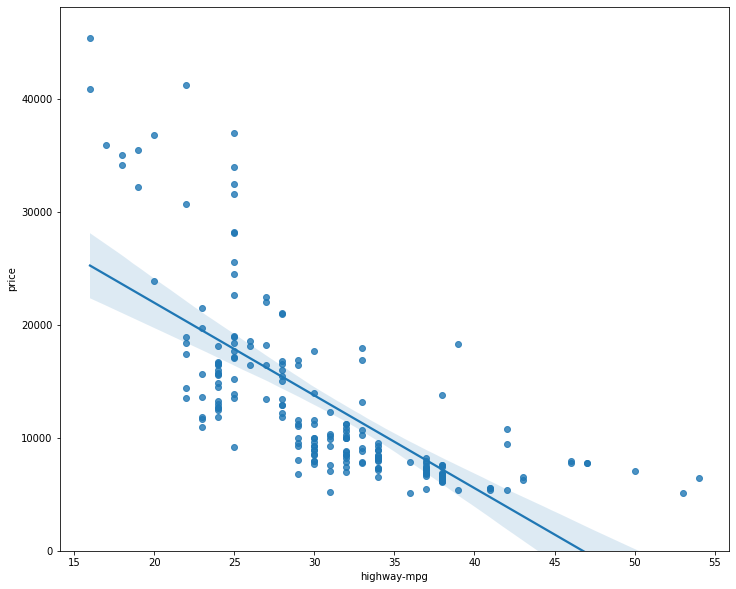

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

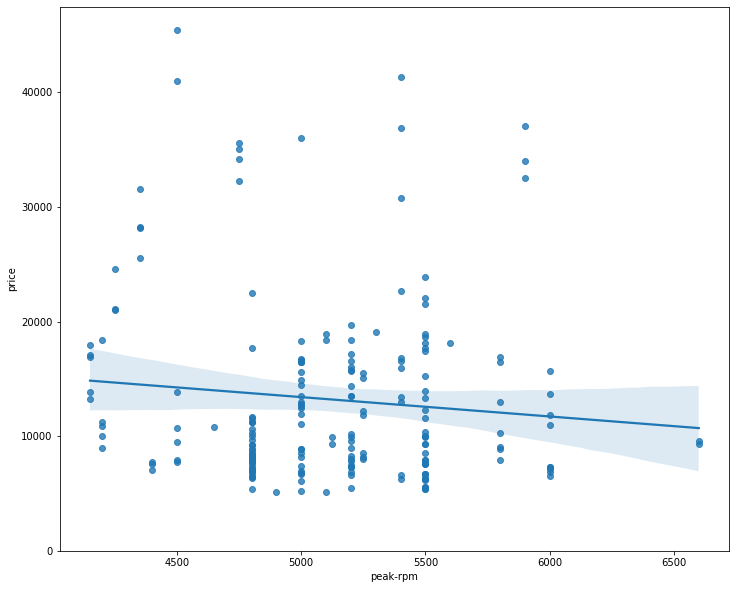

In [23]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

In [24]:
    
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Grafica residual

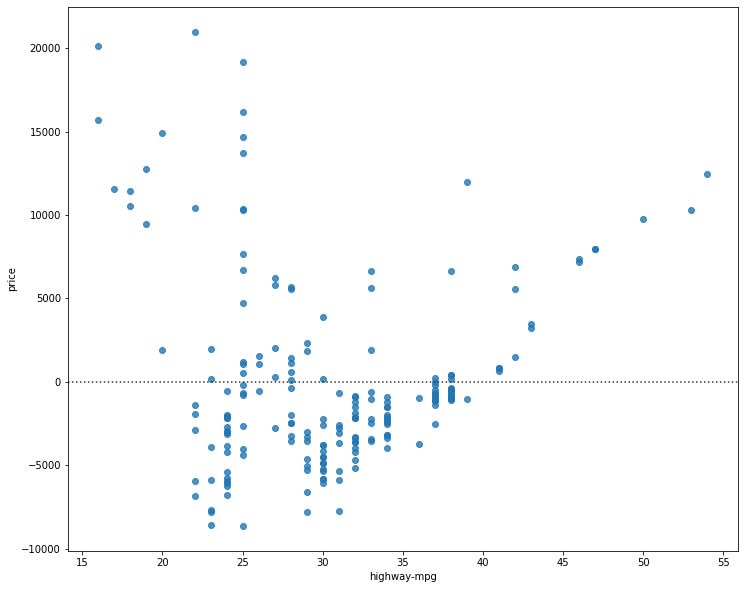

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show()

### Regresion lineal Multiple

In [32]:
Y_hat = lm.predict(Z)

C:\Users\Julio Velasquez\AppData\Local\Temp\ipykernel_22048\2128340318.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Julio Velasquez\AppData\Local\Temp\ipykernel_22048\2128340318.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

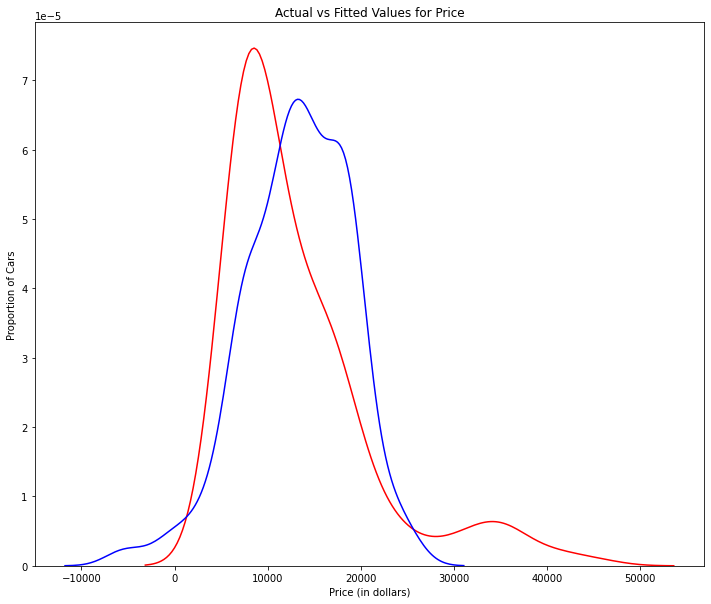

In [33]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Regresion polinomial y pipelines

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [35]:
x = df['highway-mpg']
y = df['price']

In [36]:
# Utilizamos un polinomio de tercera magnitud (cubico)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


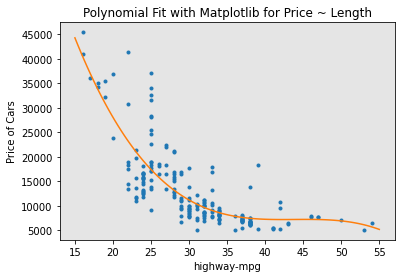

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


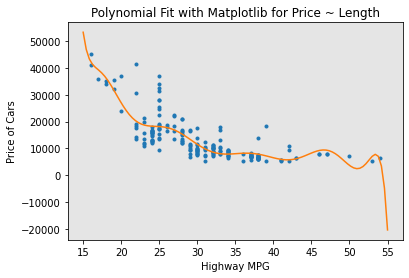

In [39]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(Z)

In [43]:
Z.shape

(201, 4)

In [44]:
Z_pr.shape

(201, 15)

### Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [47]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [50]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Mediciones para evaluaciones de muestras

#### modelo 1: regresion lineal simple

In [51]:
#highway_mpg_fit
lm.fit(X, Y)
# Encontrar R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [52]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


#### modelo 2: Regresion lineal multiple

In [55]:
# ajustar el modelo 
lm.fit(Z, df['price'])
# encontrar R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [56]:
Y_predict_multifit = lm.predict(Z)

In [57]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Modelo 3: Ajuste Polinomial

In [58]:
from sklearn.metrics import r2_score

In [59]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [60]:
mean_squared_error(df['price'], p(x))   

20474146.426361218

## prediccion y toma de desiciones

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [64]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [65]:
lm.fit(X, Y)
lm

LinearRegression()

In [66]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\Julio Velasquez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

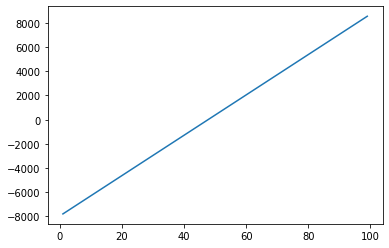

In [67]:
plt.plot(new_input, yhat)
plt.show()